In [1]:
! pip install kaggle-cli

    100% |████████████████████████████████| 81kB 3.1MB/s 
    100% |████████████████████████████████| 5.3MB 5.7MB/s 
    100% |████████████████████████████████| 102kB 26.7MB/s 
    100% |████████████████████████████████| 81kB 26.6MB/s 
  Running setup.py bdist_wheel for kaggle-cli ... - done
  Stored in directory: /root/.cache/pip/wheels/d5/bb/10/c1dd1b08c7433c943cb55c46367ae3f891415e8a37300ff8a7
  Running setup.py bdist_wheel for cliff ... - \ done
  Stored in directory: /root/.cache/pip/wheels/02/22/09/66f8c243f9c68dee7e6456a0fd6c117439a64394fdaf02d965
  Running setup.py bdist_wheel for configparser ... - done
  Stored in directory: /root/.cache/pip/wheels/a3/61/79/424ef897a2f3b14684a7de5d89e8600b460b89663e6ce9d17c
  Running setup.py bdist_wheel for PrettyTable ... - done
  Stored in directory: /root/.cache/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
  Running setup.py bdist_wheel for pyperclip ... - done
  Stored in directory: /root/.cache/pip/

In [2]:
! pip install git+https://github.com/fastai/fastai.git

  Cloning https://github.com/fastai/fastai.git to /tmp/pip-req-build-19bd1s87
    100% |████████████████████████████████| 1.5MB 14.1MB/s 
    100% |████████████████████████████████| 112kB 26.3MB/s 
    100% |████████████████████████████████| 184kB 18.9MB/s 
    100% |████████████████████████████████| 3.6MB 7.7MB/s 
    100% |████████████████████████████████| 496.4MB 35kB/s 
    100% |████████████████████████████████| 51kB 19.3MB/s 
    100% |████████████████████████████████| 61kB 16.7MB/s 
    100% |████████████████████████████████| 2.2MB 5.6MB/s 
    100% |████████████████████████████████| 11.6MB 736kB/s 
    100% |████████████████████████████████| 92kB 26.0MB/s 
    100% |████████████████████████████████| 112kB 28.3MB/s 
    100% |████████████████████████████████| 71kB 13.7MB/s 
    100% |████████████████████████████████| 901kB 3.8MB/s 
    100% |████████████████████████████████| 81kB 24.0MB/s 
    100% |████████████████████████████████| 1.5MB 4.1MB/s 
    100% |█████████████████████

In [3]:
!wget -O weights.tgz http://files.fast.ai/models/weights.tgz


Redirecting output to ‘wget-log’.


In [4]:
!tar xvfz weights.tgz -C /usr/local/lib/python3.6/dist-packages/fastai/

weights/
weights/wrn_50_2f.pth
weights/resnext_101_32x4d.pth
weights/resnext_101_64x4d.pth
weights/inceptionresnetv2-d579a627.pth
weights/inceptionv4-97ef9c30.pth
weights/resnext_50_32x4d.pth


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [7]:
from google.colab import files
files.upload()

Saving planet.py to planet.py


{'planet.py': b'from fastai.imports import *\r\nfrom fastai.transforms import *\r\nfrom fastai.dataset import *\r\nfrom sklearn.metrics import fbeta_score\r\nimport warnings\r\n\r\ndef f2(preds, targs, start=0.17, end=0.24, step=0.01):\r\n    with warnings.catch_warnings():\r\n        warnings.simplefilter("ignore")\r\n        return max([fbeta_score(targs, (preds>th), 2, average=\'samples\')\r\n                    for th in np.arange(start,end,step)])\r\n\r\ndef opt_th(preds, targs, start=0.17, end=0.24, step=0.01):\r\n    ths = np.arange(start,end,step)\r\n    idx = np.argmax([fbeta_score(targs, (preds>th), 2, average=\'samples\')\r\n                for th in ths])\r\n    return ths[idx]\r\n\r\ndef get_data(path, tfms,bs,  n, cv_idx):\r\n    val_idxs = get_cv_idxs(n, cv_idx)\r\n    return ImageClassifierData.from_csv(path, \'train-jpg\', f\'{path}train_v2.csv\', bs, tfms,\r\n                                 suffix=\'.jpg\', val_idxs=val_idxs, test_name=\'test-jpg\')\r\n\r\ndef get_da

In [8]:
! kg download -u hvorost -p Ujhjrhfrcb00 -c planet-understanding-the-amazon-from-space

/usr/local/lib/python3.6/dist-packages/mechanicalsoup/browser.py:37: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 37 of the file /usr/local/lib/python3.6/dist-packages/mechanicalsoup/browser.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  response.content, **soup_config)
downloading https://www.kaggle.com/c/planet-understanding-the-amazon-from-space/download/train-jpg.tar.7z

train-jpg.tar.7z 100% |##############################| Time: 0:00:25  23.9 MiB/s

downloading https://www.kaggle.com/c/planet-understanding-the-amazon-from-space/download/test-jpg.tar.7z

test-jpg.tar.7z 100% |###############################| Time: 0:00:24  24.9 MiB

In [12]:
! 7z x test-jpg.tar.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 632362315 bytes (604 MiB)

Extracting archive: test-jpg.tar.7z
--
Path = test-jpg.tar.7z
Type = 7z
Physical Size = 632362315
Headers Size = 98
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      0% - test-jpg.tar                     1% - test-jpg.tar                     2% - test-jpg.tar                     3% - test-jpg.tar                     4% - test-jpg.tar                     5% - test-jpg.tar                     6% - test-jpg.tar                   

In [0]:
! 7z x train-jpg.tar.7z

In [9]:
ls

Kaggle-planet-test-tif.torrent   test-tif-v2.tar.7z
Kaggle-planet-train-tif.torrent  test_v2_file_mapping.csv.zip
planet.py                        train-jpg.tar.7z
sample_data/                     train-tif-v2.tar.7z
sample_submission_v2.csv.zip     train_v2.csv.zip
test-jpg-additional.tar.7z       weights.tgz
test-jpg.tar.7z                  wget-log


In [13]:
! tar xvf train-jpg.tar

train-jpg/
train-jpg/train_21777.jpg
train-jpg/train_34567.jpg
train-jpg/train_7212.jpg
train-jpg/train_11485.jpg
train-jpg/train_14111.jpg
train-jpg/train_8634.jpg
train-jpg/train_27649.jpg
train-jpg/train_8459.jpg
train-jpg/train_12520.jpg
train-jpg/train_25962.jpg
train-jpg/train_14764.jpg
train-jpg/train_17626.jpg
train-jpg/train_25677.jpg
train-jpg/train_9660.jpg
train-jpg/train_1366.jpg
train-jpg/train_26122.jpg
train-jpg/train_24548.jpg
train-jpg/train_17415.jpg
train-jpg/train_25901.jpg
train-jpg/train_23389.jpg
train-jpg/train_25095.jpg
train-jpg/train_12922.jpg
train-jpg/train_19885.jpg
train-jpg/train_37550.jpg
train-jpg/train_21305.jpg
train-jpg/train_40436.jpg
train-jpg/train_31247.jpg
train-jpg/train_1837.jpg
train-jpg/train_6289.jpg
train-jpg/train_36691.jpg
train-jpg/train_16062.jpg
train-jpg/train_28673.jpg
train-jpg/train_22394.jpg
train-jpg/train_14346.jpg
train-jpg/train_13177.jpg
train-jpg/train_12481.jpg
train-jpg/train_3923.jpg
train-jpg/train_36787.jpg
train-jpg

In [14]:
! tar xvf test-jpg.tar

test-jpg/
test-jpg/test_20536.jpg
test-jpg/test_6844.jpg
test-jpg/test_21149.jpg
test-jpg/test_25385.jpg
test-jpg/test_7592.jpg
test-jpg/test_13398.jpg
test-jpg/test_37117.jpg
test-jpg/test_7576.jpg
test-jpg/test_19857.jpg
test-jpg/test_18813.jpg
test-jpg/test_18694.jpg
test-jpg/test_38587.jpg
test-jpg/test_9233.jpg
test-jpg/test_14398.jpg
test-jpg/test_1470.jpg
test-jpg/test_24525.jpg
test-jpg/test_22102.jpg
test-jpg/test_20400.jpg
test-jpg/test_37872.jpg
test-jpg/test_20624.jpg
test-jpg/test_5026.jpg
test-jpg/test_23648.jpg
test-jpg/test_38516.jpg
test-jpg/test_8676.jpg
test-jpg/test_601.jpg
test-jpg/test_28664.jpg
test-jpg/test_20921.jpg
test-jpg/test_12367.jpg
test-jpg/test_21362.jpg
test-jpg/test_35537.jpg
test-jpg/test_15859.jpg
test-jpg/test_23461.jpg
test-jpg/test_11175.jpg
test-jpg/test_39347.jpg
test-jpg/test_17882.jpg
test-jpg/test_9306.jpg
test-jpg/test_13664.jpg
test-jpg/test_9573.jpg
test-jpg/test_11113.jpg
test-jpg/test_36933.jpg
test-jpg/test_15147.jpg
test-jpg/test_372

In [42]:
ls

grid_sizes.csv                   three_band/
grid_sizes.csv.zip               three_band.zip
Kaggle-planet-test-tif.torrent   train_geojson_v3/
Kaggle-planet-train-tif.torrent  train_geojson_v3.zip
__MACOSX/                        train-jpg/
sample_data/                     train-jpg.tar
sample_submission.csv.zip        train-jpg.tar.7z
sample_submission_v2.csv.zip     train-tif-v2.tar.7z
sixteen_band/                    train_v2.csv
sixteen_band.zip                 train_v2.csv.zip
test-jpg/                        train_wkt_v4.csv
test-jpg-additional.tar.7z       train_wkt_v4.csv.zip
test-jpg.tar                     weights.tgz
test-jpg.tar.7z                  wget-log
test-tif-v2.tar.7z               wget-log.1
test_v2_file_mapping.csv.zip


In [15]:
! unzip train_v2.csv.zip

Archive:  train_v2.csv.zip
  inflating: train_v2.csv            
   creating: __MACOSX/
  inflating: __MACOSX/._train_v2.csv  


In [0]:
from planet import f2

In [0]:
metrics=[f2]
f_model = resnet34

In [0]:
label_csv = f'train_v2.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [0]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv('', 'train-jpg', label_csv, tfms=tfms,
                    suffix='.jpg', val_idxs=val_idxs, test_name='test-jpg')

In [0]:
data = get_data(256)

In [0]:
x,y = next(iter(data.val_dl))

In [22]:
y


    1     0     0  ...      0     0     1
    1     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
       ...          ⋱          ...       
    0     0     0  ...      0     0     1
    1     0     0  ...      0     0     0
    1     0     0  ...      0     0     0
[torch.cuda.FloatTensor of size 64x17 (GPU 0)]

In [23]:
list(zip(data.classes, y[22]))

[('agriculture', 0.0),
 ('artisinal_mine', 0.0),
 ('bare_ground', 0.0),
 ('blooming', 0.0),
 ('blow_down', 0.0),
 ('clear', 1.0),
 ('cloudy', 0.0),
 ('conventional_mine', 0.0),
 ('cultivation', 0.0),
 ('habitation', 0.0),
 ('haze', 0.0),
 ('partly_cloudy', 0.0),
 ('primary', 1.0),
 ('road', 0.0),
 ('selective_logging', 0.0),
 ('slash_burn', 0.0),
 ('water', 0.0)]

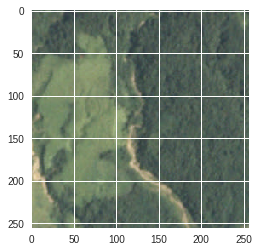

In [24]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]*1.4)

In [0]:
sz = 64

In [0]:
data = get_data(sz)

In [27]:
data = data.resize(int(sz*1.3), 'tmp')

In [28]:
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 48995352.35it/s]


epoch      trn_loss   val_loss   f2         
    0      0.226988   0.31734    0.813039  



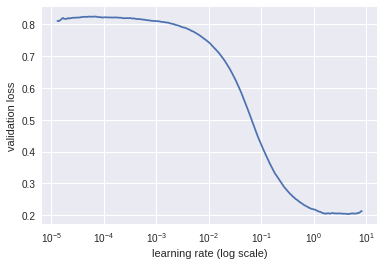

In [29]:
lrf = learn.lr_find()
learn.sched.plot()

In [0]:
lr = 0.2

In [31]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.149093   0.133376   0.882281  
    1      0.139989   0.127746   0.88869   
    2      0.138812   0.125478   0.892415  
    3      0.139671   0.126126   0.889673  
    4      0.134756   0.123115   0.894037  
    5      0.13454    0.121554   0.895698  
    6      0.132666   0.121305   0.895407  



[array([0.1213]), 0.8954066896255319]

In [0]:
lrs = np.array([lr/9, lr/3, lr])

In [33]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.121939   0.10825    0.909586  
    1      0.114852   0.103217   0.913807  
    2      0.110423   0.100498   0.914708  
    3      0.110541   0.102554   0.914791  
    4      0.103126   0.100794   0.913346  
    5      0.098717   0.096649   0.918234  
    6      0.099259   0.095317   0.920403  



[array([0.09532]), 0.9204029554002866]

In [0]:
learn.save(f'{sz}')

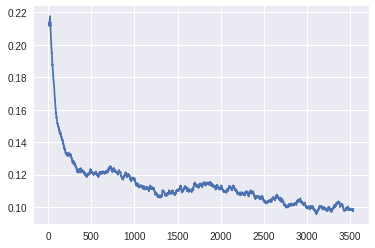

In [35]:
learn.sched.plot_loss()

In [0]:
sz = 128

In [38]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.098836   0.094862   0.91907   
    1      0.100717   0.095192   0.918035  
    2      0.098402   0.093742   0.919596  
    3      0.096641   0.094434   0.917097  
    4      0.093947   0.092      0.921906  
    5      0.095097   0.092337   0.921004  
    6      0.095915   0.091735   0.921749  



[array([0.09173]), 0.9217494867194935]

In [39]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.092608   0.086348   0.92738   
    1      0.092151   0.088      0.927679  
    2      0.090945   0.085088   0.929156  
    3      0.096548   0.08721    0.929086  
    4      0.089095   0.085029   0.927687  
    5      0.084442   0.083926   0.929639  
    6      0.082057   0.083476   0.929794  



[array([0.08348]), 0.9297943278339789]

In [0]:
learn.save(f'{sz}')

In [0]:
sz = 256

In [42]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.0897     0.088424   0.92615   
    1      0.091635   0.087605   0.927143  
    2      0.090148   0.087325   0.927286  
    3      0.091742   0.086775   0.927947  
    4      0.087394   0.086164   0.928272  
    5      0.087769   0.086023   0.928291  
    6      0.089596   0.086144   0.928198  



[array([0.08614]), 0.9281981951100994]

In [43]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.087049   0.082336   0.932153  
    1      0.089658   0.08302    0.931358  
    2      0.082869   0.081552   0.933006  
    3      0.086119   0.0836     0.931521  
    4      0.082254   0.081951   0.934336  
    5      0.080697   0.080898   0.93342   
    6      0.080011   0.080773   0.933871  



[array([0.08077]), 0.9338713333682651]

In [0]:
learn.save(f'{sz}')

In [0]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

In [0]:
f2(preds,y)